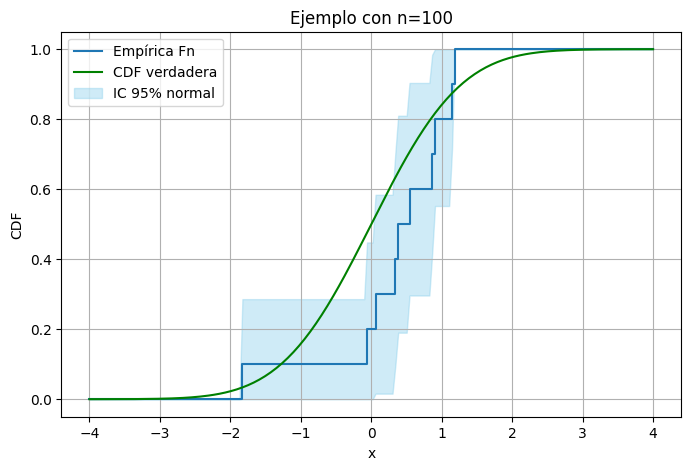

In [14]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

n = 10
m = 1000
alpha = 0.05
confianza = 1 - alpha
grid = np.linspace(-4, 4, 200)

# Evaluar la CDF verdadera de N(0,1) sobre la grilla existente x_grid
F_true = stats.norm.cdf(grid, loc=0, scale=1)

z_crit = stats.norm.ppf(1 - alpha / 2)

# Empirical CDF en grilla
def empirical_cdf(sample, grid):
    return np.searchsorted(np.sort(sample), grid, side="right") / len(sample)


sample = np.random.normal(0, 1, n)

Fn = empirical_cdf(sample, grid)
F_true = stats.norm.cdf(grid)

# IC normal para proporción
se = np.sqrt(Fn * (1 - Fn) / n)
lower = np.clip(Fn - 1.96 * se, 0, 1)
upper = np.clip(Fn + 1.96 * se, 0, 1)

plt.figure(figsize=(8,5))
plt.step(grid, Fn, where="post", label="Empírica Fn")
plt.plot(grid, F_true, "g", label="CDF verdadera")
plt.fill_between(grid, lower, upper, color="skyblue", alpha=0.4, label="IC 95% normal")
plt.legend()
plt.xlabel("x")
plt.ylabel("CDF")
plt.title("Ejemplo con n=100")
plt.grid(True)
plt.show()